<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/Soluci%C3%B3n%20de%20problema%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema Actividad 10**
Dos personas han quedado citadas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos.

## *Solución analítica*
Planteamiento del problema:

Sea $ X ∼ U(0,30) $ : hora de llegada de la primera persona.

Sea $Y∼U(0,30)$: hora de llegada de la segunda persona.

Ambas llegan de forma independiente, y uniformemente distribuidas entre 0 y 30 minutos.

Queremos calcular la probabilidad de que una persona no espere más de 10 minutos a la otra, es decir,
$$ P(∣X−Y∣≤10) $$

Consideramos el cuadrado $ [0,30]×[0,30] $, donde cada punto representa una pareja de tiempos de llegada $(X,Y)$.

La condición $∣X−Y∣≤10$ corresponde a la región entre las rectas $Y=X+10$ y $Y=X−10$
Dentro del cuadrado, esta es la región central entre estas dos rectas.

El área total del cuadrado es
$$ A_{total} = (30)(30) = 900 $$

El área fuera de la banda de espera $≤10$:

Son dos triángulos isósceles rectángulos, uno en cada esquina del cuadrado. Cada uno tiene catetos de longitud 20
$$ A_{fuera} = 2(\frac{1}{2} (20) (20)) = 2(200) = 400 $$

Área deseada (espera $≤10$):
$$ A_{deseada} = 900 - 400 = 500 $$

Probabilidad buscada:
$$ P(∣X−Y∣≤10) = \frac{A_{deseada}}{A_{total}} = \frac{500}{900} ≈0.5556 $$






## *Solución por simulación*
Usamos la simulación de Monte Carlo, la cual consiste en repetir un experimento muchas veces al azar para aproximar una probabilidad.

En este caso:
*   **Experimento:** dos personas llegan a una cita
*   **Resultado aleatorio:** cada persona llega en un momento entre 0 y 30 minutos (uniformemente al azar).
*   **Éxito:** si la diferencia de tiempo entre sus llegadas es menor o igual a 10 minutos.














In [18]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

Vamos a generar N llegadas aleatorias, creando dos listas con tiempos de llegada aleatorios (que sean entre 0 y 30 minutos) para cada persona:

In [19]:
# Parámetros
N = 10000 # número de simulaciones

# Intervalo de llegada:
lim_inf = 0
lim_sup = 30

x = np.random.uniform(lim_inf, lim_sup, N)
y = np.random.uniform(lim_inf, lim_sup, N)

Para cada par de llegadas $(x_i,y_i)$ vamos a calcular la diferencia absoluta y vamos a contar cuántos éxitos tuvimos en nuestra simulación, es decir, cuántas veces la diferencia fue menor o igual a 10 minutos.

In [20]:
diferencia = np.abs(x-y)

exitos = np.sum(diferencia <= 10)

Encontramos la probabilidad simulada dividiendo el número de éxitos entre las veces que realizamos la simulación y visualizamos el gráfico donde los puntos azules representan el número de éxitos y los puntos rojos representan el número de fracasos.

La probabilidad obtenida fue: 0.5603


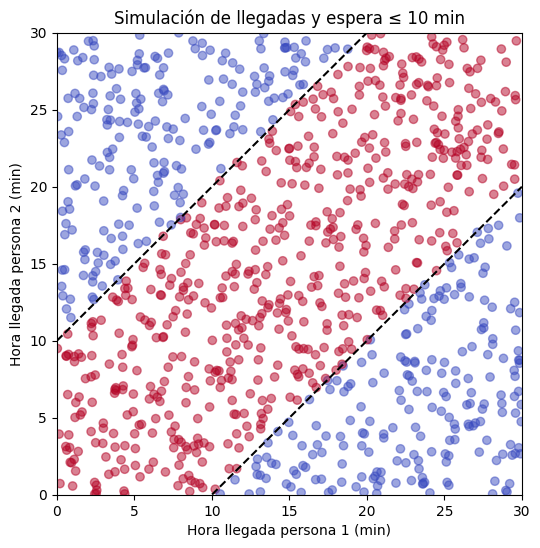

In [21]:
probabilidad = exitos / N

print(f"La probabilidad obtenida fue: {probabilidad}")

# Visualización de los puntos simulados
plt.figure(figsize=(6,6))
plt.scatter(x[:1000], y[:1000], c=(np.abs(x[:1000] - y[:1000]) <= 10), cmap='coolwarm', alpha=0.5)
plt.plot([0, 30], [10, 40], 'k--', label='y = x + 10')
plt.plot([0, 30], [-10, 20], 'k--', label='y = x - 10')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('Hora llegada persona 1 (min)')
plt.ylabel('Hora llegada persona 2 (min)')
plt.title('Simulación de llegadas y espera ≤ 10 min')
plt.show()

Comparando con la solución anlítica:

In [22]:
# Solución analítica
area_total = (lim_sup - lim_inf) ** 2
area_fuera = 2 * (0.5 * (lim_sup - 10) ** 2)
area_deseada = area_total - area_fuera
prob_analitica = area_deseada / area_total

print(f"Probabilidad analítica: {prob_analitica:.4f}")
print(f"La probabilidad de la simulación: {probabilidad}")
print(f"\nDiferencia absoluta de ambas probabilidades: {abs(prob_analitica - probabilidad)}")

Probabilidad analítica: 0.5556
La probabilidad de la simulación: 0.5603

Diferencia absoluta de ambas probabilidades: 0.00474444444444444


De esta forma, vemos que el error entre la probabilidad de la solución analítica y la de la solución con simulación es de **0.0047444444**, siendo un error pequeño.

Por lo tanto, podemos decir que tuvimos una buena estimación en ambas soluciones.